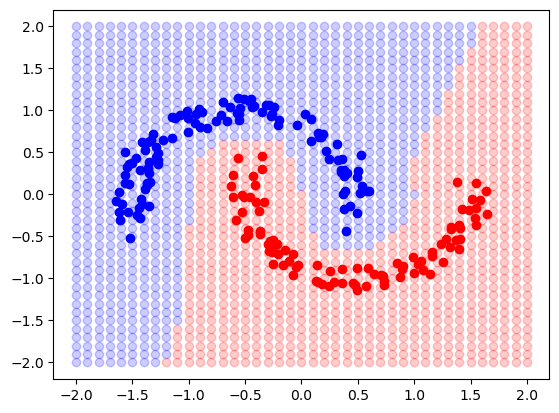

In [1]:
#Question 1

import matplotlib.pyplot as plt
import math
import numpy as np

def parse_file(filename):
    X = []
    Y = []
    
    file = open(filename, mode = 'r', encoding = 'utf-8-sig')
    lines = file.readlines()
    file.close()
    for line in lines:
        line = line.split(' ')
        X.append([float(line[0]), float(line[1])])
        Y.append(float(line[2].strip()))
        
    return (X, Y)

def calc_distance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    
    return np.sqrt(np.sum((point1-point2) ** 2))

def calc_nearest_neighbor_label_direct(X, Y, point):
    closest_distance = calc_distance(X[0], point)
    label = Y[0]
    for i in range(1, len(X)):
        distance = calc_distance(X[i], point)
        if (distance < closest_distance):
            closest_distance = distance
            label = Y[i]
    
    return label

def calc_nearest_neighbor_label(X, Y, point_index, distance_matrix):
    closest_distance = distance_matrix[point_index][0]
    label = Y[0]
    for i in range(1, len(X)):
        distance = distance_matrix[point_index][i]
        if (distance < closest_distance):
            closest_distance = distance
            label = Y[i]
    
    return label

def calc_k_nearest_neighbor_label(X, Y, point_index, k, threshold, distance_matrix):
    point_indices = [i for i in range(k)]
    distances = [distance_matrix[point_index][i] for i in range(k)]
    labels = [Y[i] for i in range(k)]
    for i in range(k, len(X)):
        distance = distance_matrix[point_index][i]
        if (distance < max(distances)):
            index = distances.index(max(distances))
            point_indices[index] = i
            distances[index] = distance
            labels[index] = Y[i]
    
    if (threshold == None):
        threshold = 0.5
        
    if ((sum(labels) / len(labels)) > threshold):
        return 1
    else:
        return 0

def calc_accuracy(TP, FP, TN, FN):
    return (TP + TN) / (TP + FP + TN + FN)
    
def calc_precision(TP, FP, TN, FN):
    return TP / (TP + FP)
    
def calc_recall(TP, FP, TN, FN):
    return TP / (TP + FN)

def calc_weights(X, Y, learning_rate, num_iter):
    m = len(X)
    n = len(X[0])
    X = np.array(X)
    X = np.append(X, np.ones([m,1]), 1) #Add bias term
    Y = np.transpose(np.array(Y))
    theta_prev = np.zeros(n+1)
    
    for i in range(num_iter):
        hypothesis = 1 / (1 + np.exp(-np.matmul(theta_prev, np.transpose(X))))
        gradient = (1/m) * np.matmul(np.transpose(X), (hypothesis - Y))
        theta_next = theta_prev - learning_rate * gradient
        theta_prev = theta_next
    
    return theta_next
    

def compare_predictions(predictions, Y_test):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(predictions)):
        if (predictions[i] == Y_test[i]):
            if (predictions[i] == 1):
                TP += 1
            else:
                TN += 1
        else:
            if (predictions[i] == 1):
                FP += 1
            else:
                FN += 1
        
    return (TP, FP, TN, FN)
        

X, Y = parse_file('D2z.txt')
test_X = []
test_X_labels = []
test_X_zeros = []
test_X_ones = []
train_X_zeros = []
train_X_ones = []

for i in range(41):
    for j in range(41):
        test_X.append([-2 + (0.1*i), -2 + (0.1*j)])
        
for i in range(len(test_X)):
    label = calc_nearest_neighbor_label_direct(X, Y, test_X[i])
    test_X_labels.append(label)
    if (label == 0):
        test_X_zeros.append(test_X[i])
    else:
        test_X_ones.append(test_X[i])

for i in range(len(X)):
    if (Y[i] == 0):
        train_X_zeros.append(X[i])
    else:
        train_X_ones.append(X[i])

plt.scatter([point[0] for point in test_X_zeros], [point[1] for point in test_X_zeros], color="Red", alpha=0.2)
plt.scatter([point[0] for point in test_X_ones], [point[1] for point in test_X_ones], color="Blue", alpha=0.2)
plt.scatter([point[0] for point in train_X_zeros], [point[1] for point in train_X_zeros], color="Red")
plt.scatter([point[0] for point in train_X_ones], [point[1] for point in train_X_ones], color="Blue")

In [14]:
#Question 2

import pandas
 
emailData = pandas.read_csv('emails.csv')

X = emailData.drop(columns=['Email No.', 'Prediction']).values.tolist()
Y = emailData['Prediction'].tolist()
X1_test = X[0:1000]
X1_train = X[1000:5000]
X2_test = X[1000:2000]
X2_train = X[0:1000] + X[2000:5000]
X3_test = X[2000:3000]
X3_train = X[0:2000] + X[3000:5000]
X4_test = X[3000:4000]
X4_train = X[0:3000] + X[4000:5000]
X5_test = X[4000:5000]
X5_train = X[0:4000]
Y1_test = Y[0:1000]
Y1_train = Y[1000:5000]
Y2_test = Y[1000:2000]
Y2_train = Y[0:1000] + Y[2000:5000]
Y3_test = Y[2000:3000]
Y3_train = Y[0:2000] + Y[3000:5000]
Y4_test = Y[3000:4000]
Y4_train = Y[0:3000] + Y[4000:5000]
Y5_test = Y[4000:5000]
Y5_train = Y[0:4000]

distance_matrix = []
for i in range(len(X)):
    distance_matrix.append([])
    for j in range(len(X)):
        distance_matrix[i].append(calc_distance(X[i],X[j]))

distance_matrix = np.array(distance_matrix)       

distance_matrix_1 = distance_matrix[0:1000,1000:5000]
distance_matrix_2 = np.hstack((distance_matrix[1000:2000,0:1000], distance_matrix[1000:2000,2000:5000]))
distance_matrix_3 = np.hstack((distance_matrix[2000:3000,0:2000], distance_matrix[2000:3000,3000:5000]))
distance_matrix_4 = np.hstack((distance_matrix[3000:4000,0:3000], distance_matrix[3000:4000,4000:5000]))
distance_matrix_5 = distance_matrix[4000:5000,0:4000]

distance_matrices = [distance_matrix_1, distance_matrix_2, distance_matrix_3, distance_matrix_4, distance_matrix_5]

cross_val_X_train = [X1_train, X2_train, X3_train, X4_train, X5_train]
cross_val_X_test = [X1_test, X2_test, X3_test, X4_test, X5_test]
cross_val_Y_train = [Y1_train, Y2_train, Y3_train, Y4_train, Y5_train]
cross_val_Y_test = [Y1_test, Y2_test, Y3_test, Y4_test, Y5_test]

for i in range(5):
    X_train = cross_val_X_train[i]
    X_test = cross_val_X_test[i]
    Y_train = cross_val_Y_train[i]
    Y_test = cross_val_Y_test[i]
    
    predictions = []
    for j in range(len(X_test)):
        predictions.append(calc_nearest_neighbor_label(X_train, Y_train, j, distance_matrices[i]))
    
    TP, FP, TN, FN = compare_predictions(predictions, Y_test)
    print("Cross Validation Fold " + str(i+1) + ":")
    print("Accuracy: " + str(calc_accuracy(TP, FP, TN, FN)))
    print("Precision: " + str(calc_precision(TP, FP, TN, FN)))
    print("Recall: " + str(calc_recall(TP, FP, TN, FN)))
        

(1000, 4000)
Cross Validation Fold 1:
Accuracy: 0.825
Precision: 0.6544943820224719
Recall: 0.8175438596491228
Cross Validation Fold 2:
Accuracy: 0.853
Precision: 0.6857142857142857
Recall: 0.8664259927797834
Cross Validation Fold 3:
Accuracy: 0.862
Precision: 0.7212121212121212
Recall: 0.8380281690140845
Cross Validation Fold 4:
Accuracy: 0.851
Precision: 0.7164179104477612
Recall: 0.8163265306122449
Cross Validation Fold 5:
Accuracy: 0.775
Precision: 0.6057441253263708
Recall: 0.7581699346405228


In [15]:
#Question 3
for i in range(5):
    X_train = cross_val_X_train[i]
    X_test = cross_val_X_test[i]
    Y_train = cross_val_Y_train[i]
    Y_test = cross_val_Y_test[i]
    learning_rate = 0.05
    num_iter = 20000

    weights = calc_weights(X_train, Y_train, learning_rate, num_iter)
    predictions = []
    for j in range(len(X_test)):
        hypothesis = 1 / (1 + np.exp(-np.dot(weights, np.array(X_test[j] + [1]))))
        if (hypothesis >= 0.5):
            predictions.append(1)
        else:
            predictions.append(0)

    TP, FP, TN, FN = compare_predictions(predictions, Y_test)
    print("Cross Validation Fold " + str(i+1) + ":")
    print("Accuracy: " + str(calc_accuracy(TP, FP, TN, FN)))
    print("Precision: " + str(calc_precision(TP, FP, TN, FN)))
    print("Recall: " + str(calc_recall(TP, FP, TN, FN)))

/var/folders/ng/tyw_c8dx1ss0kny35zj2qnkm0000gn/T/ipykernel_46810/2830331262.py:87: RuntimeWarning: overflow encountered in exp
  hypothesis = 1 / (1 + np.exp(-np.matmul(theta_prev, np.transpose(X))))
/var/folders/ng/tyw_c8dx1ss0kny35zj2qnkm0000gn/T/ipykernel_46810/3402854861.py:13: RuntimeWarning: overflow encountered in exp
  hypothesis = 1 / (1 + np.exp(-np.dot(weights, np.array(X_test[j] + [1]))))


Cross Validation Fold 1:
Accuracy: 0.96
Precision: 0.9180887372013652
Recall: 0.9438596491228071
Cross Validation Fold 2:
Accuracy: 0.963
Precision: 0.9444444444444444
Recall: 0.9205776173285198
Cross Validation Fold 3:
Accuracy: 0.95
Precision: 0.9239130434782609
Recall: 0.897887323943662
Cross Validation Fold 4:
Accuracy: 0.954
Precision: 0.9105960264900662
Recall: 0.935374149659864
Cross Validation Fold 5:
Accuracy: 0.921
Precision: 0.8721311475409836
Recall: 0.869281045751634


[0.8332, 0.8416, 0.8426, 0.8454, 0.8550000000000001]


Text(0, 0.5, 'Accuracy')

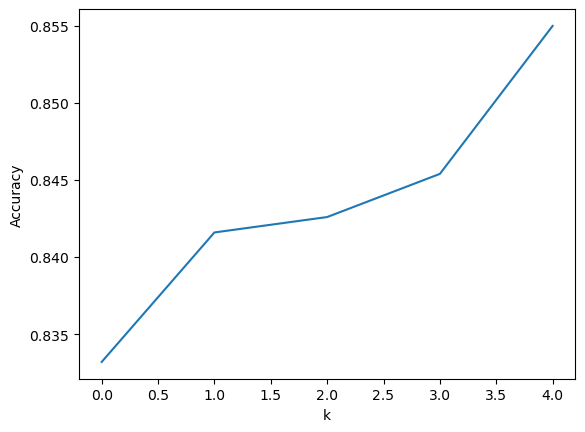

In [16]:
#Question 4
k_list = [1,3,5,7,10]
k_accuracy = []
for i in range(len(k_list)):
    k = k_list[i]
    accuracy_list = []
    for j in range(5):
        X_train = cross_val_X_train[j]
        X_test = cross_val_X_test[j]
        Y_train = cross_val_Y_train[j]
        Y_test = cross_val_Y_test[j]

        predictions = []
        for n in range(len(X_test)):
            predictions.append(calc_k_nearest_neighbor_label(X_train, Y_train, n, k, None, distance_matrices[j]))

        TP, FP, TN, FN = compare_predictions(predictions, Y_test)
        accuracy_list.append(calc_accuracy(TP, FP, TN, FN))
    
    k_accuracy.append(sum(accuracy_list) / len(accuracy_list))
    
print(k_accuracy)

plt.plot([i for i in range(5)], k_accuracy)
plt.xlabel("k")
plt.ylabel("Accuracy")

In [19]:
#Question 5 Part 1

X_train = X1_train
X_test = X1_test
Y_train = Y1_train
Y_test = Y1_test

FPR_knn = []
TPR_knn = []
thresholds = [i * 0.1 for i in range(11)]
for i in range(len(thresholds)):
    predictions = []
    for j in range(len(X_test)):
        predictions.append(calc_k_nearest_neighbor_label(X_train, Y_train, j, 5, thresholds[i], distance_matrix_1))
        
    TP, FP, TN, FN = compare_predictions(predictions, Y_test)
    TPR_knn.append(TP / (TP + FN))
    FPR_knn.append(FP / (FP + TN))

/var/folders/ng/tyw_c8dx1ss0kny35zj2qnkm0000gn/T/ipykernel_46810/2830331262.py:87: RuntimeWarning: overflow encountered in exp
  hypothesis = 1 / (1 + np.exp(-np.matmul(theta_prev, np.transpose(X))))
/var/folders/ng/tyw_c8dx1ss0kny35zj2qnkm0000gn/T/ipykernel_46810/3369024313.py:10: RuntimeWarning: overflow encountered in exp
  hypothesis = 1 / (1 + np.exp(-np.dot(weights, np.array(X_test[j] + [1]))))


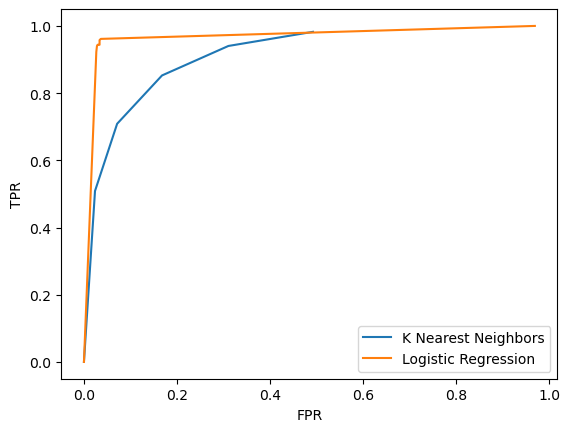

In [20]:
#Question 5 Part 2

FPR_lg = []
TPR_lg = []
weights = calc_weights(X_train, Y_train, 0.05, 20000)

for i in range(len(thresholds)):
    predictions = []
    for j in range(len(X_test)):
        hypothesis = 1 / (1 + np.exp(-np.dot(weights, np.array(X_test[j] + [1]))))
        if (hypothesis > thresholds[i]):
            predictions.append(1)
        else:
            predictions.append(0)
            
    TP, FP, TN, FN = compare_predictions(predictions, Y_test)
    TPR_lg.append(TP / (TP + FN))
    FPR_lg.append(FP / (FP + TN))
    
plt.plot(FPR_knn, TPR_knn, label='K Nearest Neighbors')
plt.plot(FPR_lg, TPR_lg, label='Logistic Regression')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()